<a href="https://colab.research.google.com/github/mkjubran/ENEE4103/blob/master/AM_Modulation_and_Demodulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This experiment covers the Normal AM Modulation and Demodulation in the time and frequency domains.

Import necessary libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

# Normal AM in the time domain

In this section we will produce the Normal AM signal $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ to represent the AM signal in the time and frequency domains and to study the affect of changing any of the signal parameters.

Let us start by producing the message signal $m(t)=A_ccos(2 \pi f_mt)$ and the carrier $c(t)=A_ccos(2 \pi f_ct)$ and then produce the AM signal $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ in the time domain.

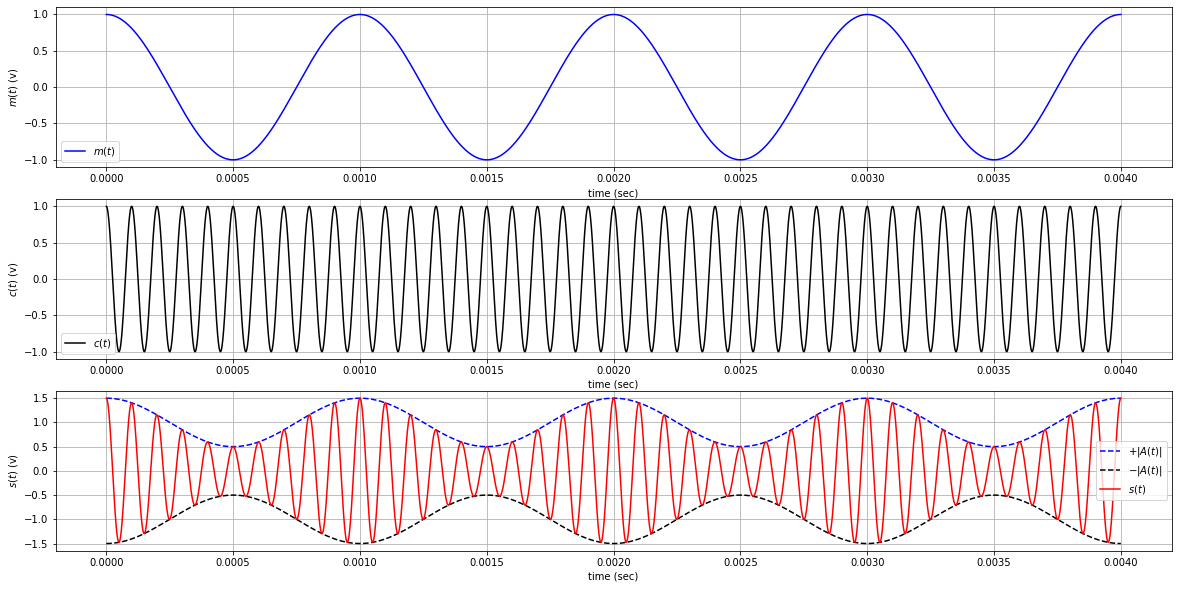

In [22]:
Am=1 # amplitude of message signal
fm=1000 # frequency of message signal
Ac=1 # amplitude of carrier signal
fc=10000 # frquency of carrier signal
Ka=0.5 # amplitude sensitivity


## -- no need to change code after this line
## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=(1+Ka*mt)*ct # normal AM modulation
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(311)
ax3 = f.add_subplot(312)
ax5 = f.add_subplot(313)

# plot the signals
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()
ax1.grid()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()
ax3.grid()

ax5.plot(t,At,'b--',label='$+|A(t)|$')
ax5.plot(t,-1*At,'k--', label='$-|A(t)|$')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()
ax5.grid()

## ---- frequency-domain
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=(1+Ka*mt)*ct # normal AM modulation
At=Ac*(1+Ka*mt)


# Normal AM in the time and frequency domains

Now let us view the message signal $m(t)=A_ccos(2 \pi f_mt)$, the carrier $c(t)=A_ccos(2 \pi f_ct)$, and the AM signal $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ in the time and frequency domains

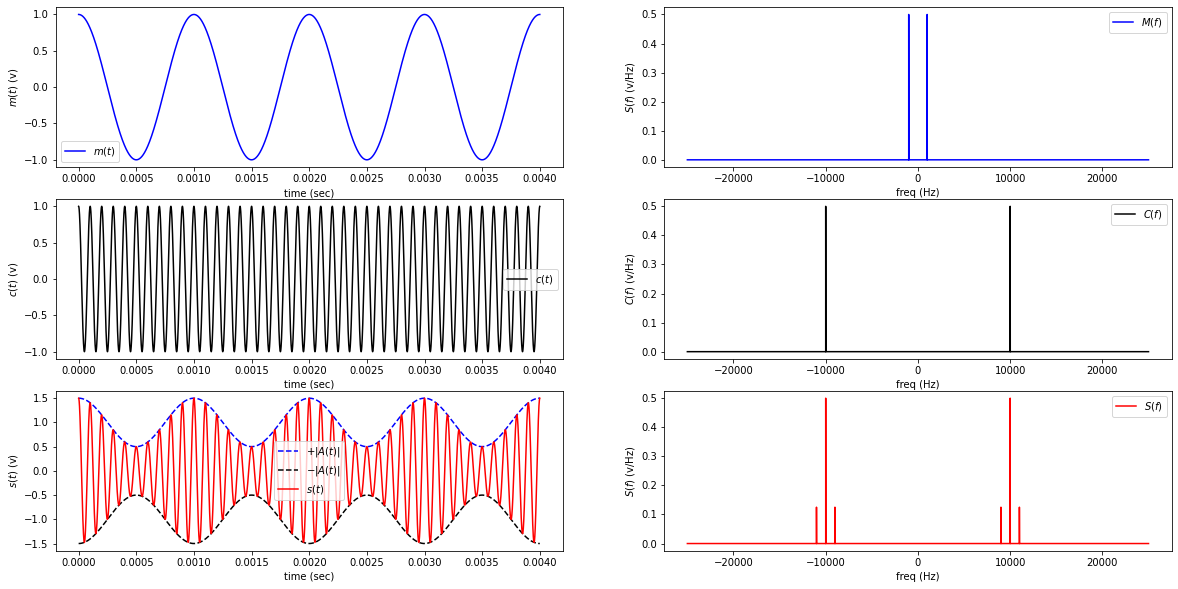

In [23]:
Am=1 # amplitude of message signal
fm=1000 # frequency of message signal
Ac=1 # amplitude of carrier signal
fc=10000 # frquency of carrier signal
Ka=0.5 # amplitude sensitivity


## -- no need to change code after this line
## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=(1+Ka*mt)*ct # normal AM modulation
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--',label='$+|A(t)|$')
ax5.plot(t,-1*At,'k--', label='$-|A(t)|$')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- frequency-domain
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=(1+Ka*mt)*ct # normal AM modulation
At=Ac*(1+Ka*mt)

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()


**Exercise**: change the values of the following parameters and observe the signal and its spectrum: \\
1- $f_m$ \\
2- $f_c$ \\
3- $A_m$ \\
4- $A_c$ \\
5- $K_a$ \\

# The effect of changing the AM modulation index $\mu$

In this section, we will investigate the effect of changing the modulation index $\mu$

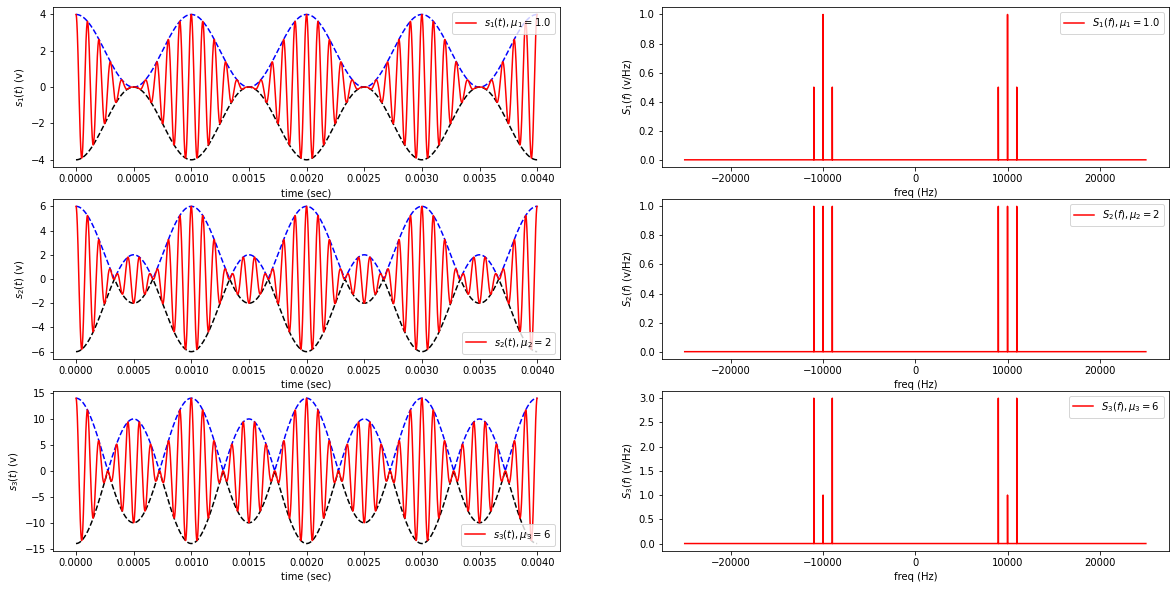

In [24]:
Am1=0.5  # amplitude of first message signal
Am2=1 # amplitude of second message signal
Am3=3 # amplitude of third message signal
fm=1000 # frequency of message signals

Ac=2 # amplitude of carrier signal
fc=10000 # frequency of carrier signal
Ka=2 # amplitude sensitivity

## -- no need to change code after this line
## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt1=Am1*np.cos(2*math.pi*fm*t) # first message
mt2=Am2*np.cos(2*math.pi*fm*t) # second message signal
mt3=Am3*np.cos(2*math.pi*fm*t) # third message signal
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st1=(1+Ka*mt1)*ct # normal AM modulation
st2=(1+Ka*mt2)*ct # normal AM modulation
st3=(1+Ka*mt3)*ct # normal AM modulation
At1=np.abs(Ac*(1+Ka*mt1))
At2=np.abs(Ac*(1+Ka*mt2))
At3=np.abs(Ac*(1+Ka*mt3))

mu1=Am1*Ka
mu2=Am2*Ka
mu3=Am3*Ka

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,At1,'b--',)
ax1.plot(t,-1*At1,'k--')
ax1.plot(t,st1,'r', label='$s_1(t), \mu_1=$'+str(mu1))
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$s_1(t)$ (v)')
ax1.legend()

ax3.plot(t,At2,'b--')
ax3.plot(t,-1*At2,'k--')
ax3.plot(t,st2,'r',label='$s_2(t), \mu_2=$'+str(mu2))
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$s_2(t)$ (v)')
ax3.legend()

ax5.plot(t,At3,'b--')
ax5.plot(t,-1*At3,'k--')
ax5.plot(t,st3,'r',label='$s_3(t), \mu_3=$'+str(mu3))
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s_3(t)$ (v)')
ax5.legend()
## ---- frequency-domain
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc
t=np.arange(Tstart,Tstop,Tstep) # time
mt1=Am1*np.cos(2*math.pi*fm*t) # first message
mt2=Am2*np.cos(2*math.pi*fm*t) # second message signal
mt3=Am3*np.cos(2*math.pi*fm*t) # third message signal
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st1=(1+Ka*mt1)*ct # signal moddulated by the first message
st2=(1+Ka*mt2)*ct # signal moddulated by the second message
st3=(1+Ka*mt3)*ct # signal moddulated by the third message
At1=np.abs(Ac*(1+Ka*mt1))
At2=np.abs(Ac*(1+Ka*mt2))
At3=np.abs(Ac*(1+Ka*mt3))

Sf1 = np.abs(np.fft.fft(st1))
freqs = np.fft.fftfreq(st1.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf1=Sf1[idx]/N
ax2.plot(freqs, Sf1,'r',label='$S_1(f), \mu_1=$'+str(mu1))
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S_1(f)$ (v/Hz)')
ax2.legend()

Sf2 = np.abs(np.fft.fft(st2))
freqs = np.fft.fftfreq(st2.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf2=Sf2[idx]/N
ax4.plot(freqs, Sf2,'r',label='$S_2(f), \mu_2=$'+str(mu2))
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$S_2(f)$ (v/Hz)')
ax4.legend()

Sf3 = np.abs(np.fft.fft(st3))
freqs = np.fft.fftfreq(st3.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf3=Sf3[idx]/N
ax6.plot(freqs, Sf3,'r',label='$S_3(f), \mu_3=$'+str(mu3))
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S_3(f)$ (v/Hz)')
ax6.legend()

**Exercise**: change the values of the following parameters and observe the signal and its spectrum: \\
1- $A_{m1}$, $A_{m2}$, and $A_{m3}$  \\
2- $K_a$ \\

# Normal AM modulation of a message signal with multiple harmonics *

Let us compute the plot the signal and spectrum of $X(t)=A_{m1}cos(2 \pi f_{c1}t)+A_{m2}cos(2 \pi f_{c2}t)+A_{m3}cos(2 \pi f_{c3}t)$

First we create a function to produce m(t)

In [ ]:
def func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t):
   m1t=Am1*np.cos(2*math.pi*fm1*t) # message #1
   m2t=Am2*np.cos(2*math.pi*fm2*t) # message #2
   m3t=Am3*np.cos(2*math.pi*fm3*t) # message #3
   mt=m1t+m2t+m3t # message signal
   return mt

Then we create a function that produce c(t)

In [ ]:
def func_ct(Ac,fc,t):
   ct=Ac*np.cos(2*math.pi*fc*t) # carrier
   return ct

Now, we create a function that produce the normal AM modulation signal s(t)

In [ ]:
def Am_mod(mt,ct,Ka):
   st=(1+Ka*mt)*ct # normal AM modulation
   return st

In the next code, we produce the signals and plot them in the time and frequency domain

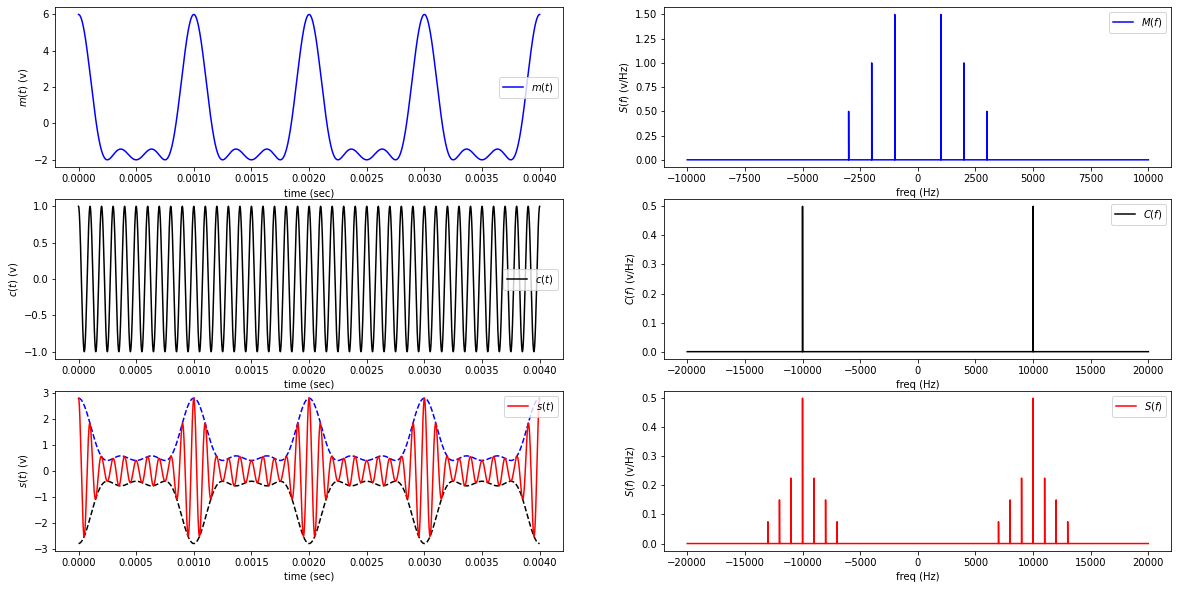

In [ ]:
Am1=3 # amplitude of message signal
fm1=1000 # frequency of message signal

Am2=2 # amplitude of message signal
fm2=2000 # frequency of messagecarrier signal

Am3=1 # amplitude of message signal
fm3=3000 # frequency of message signal

Ac=1 # amplitude of carrier signal
fc=10000 # frequency of carrier signal
Ka=0.3 # amplitude sensitivity

fm1_3=[fm1,fm2,fm3]

## -- no need to change code after this line
## Compute fundemntal freq of the message signal for plotting purposes
fm=np.gcd.reduce(fm1_3)

## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t) # carrier
st=Am_mod(mt,ct,Ka) # normal AM modulation
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--')
ax5.plot(t,-1*At,'k--')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- frequency-domain
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.25/fc
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t) # carrier
st=Am_mod(mt,ct,Ka) # normal AM modulation
At=np.abs(Ac*(1+Ka*mt))

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

**Exercise**: change the values of the following parameters and observe the signal and its spectrum: \\
1- The frequency of each component of the message signal; $f_{m1}$, $f_{m2}$, and $f_{m3}$ \\
2- $f_c$ \\
3- The Amplitude of each component of the message signal; $A_{m1}$, $A_{m2}$, and $A_{m3}$ \\
4- $A_c$ \\

# Demodulation of Normal AM

In this section, we will use an envelop detector with a capacitor to demodulate the AM modulated signal. 

Let us define the impulse response of the filter

In [ ]:
def func_filter(Vrc,trc,Tau):
  #B=1/(2*math.pi*Tau)
  #gt1=Vc0*math.exp(-1*2*math.pi*B*ti)
  grc=Vrc*np.exp(-1*trc/Tau)
  return grc

plot the impluse reponse of the filter

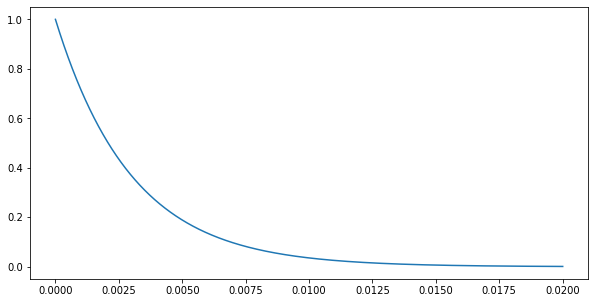

In [ ]:
## ---- time-domain
fm=100
Tstart=0
Tstop=2/fm
Tstep=0.00002/fm
Tau=3/1000
t=np.arange(Tstart,Tstop,Tstep) # time
Vc0=1
rt=[]
for tc in t:
  rt.append(func_filter(Vc0,tc,Tau))
plt.figure(figsize=(10,5))
plt.plot(t,rt)

Here, we compute r(t) which presents the output of the enevlop detector.

Tc = 0.001, Tau = 0.003, Tm = 0.01


(0.0, 0.01)

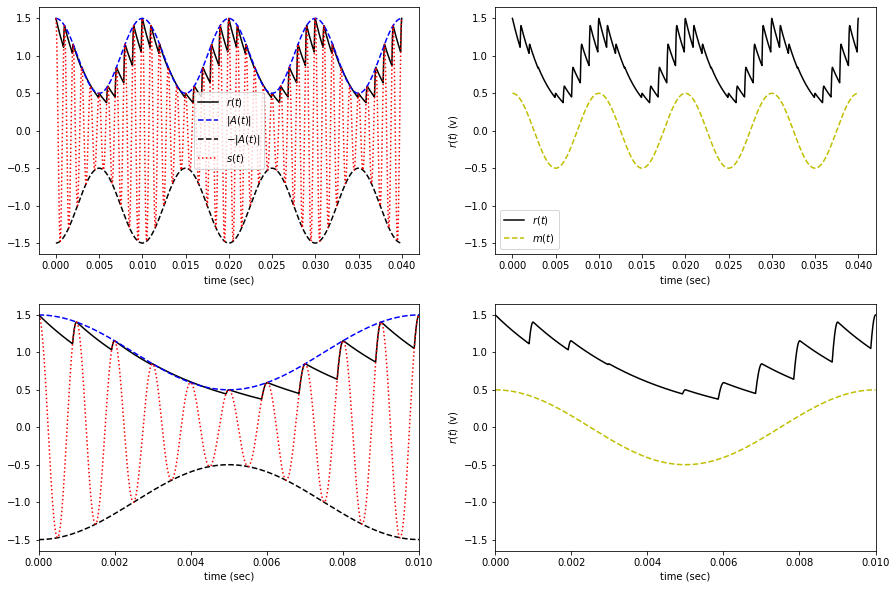

In [ ]:
Am=0.5 # amplitude of message signal
fm=100 # frequency of message signal
Ac=1 # amplitude of carrier signal
fc=1000 # fequency of carrier signal
Ka=1 # amplitude sensitivity
Tau=3/1000

Tstart=0
Tstop=4/fm
Tstep=0.00002/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=(1+Ka*mt)*ct # normal AM modulation
At=np.abs(Ac*(1+Ka*mt))

Vc0=st[0]
gt=func_filter(Vc0,0,Tau)
rt=[]
T=0
t1=[]
for cnt in range(len(t)):
  if st[cnt]>=gt:
    rt.append(st[cnt])
    T=t[cnt]
    Vc0=st[cnt]
    gt=st[cnt]
  else:
    t1.append(t[cnt]-T)
    rt.append(gt)
    gt=func_filter(Vc0,t[cnt]-T,Tau)

print('Tc = {}, Tau = {}, Tm = {}'.format(1/fc,Tau,1/fm))

f = plt.figure(figsize=(15,10))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

ax1.plot(t,rt,'k',label='$r(t)$')
ax1.plot(t,At,'b--',label='$|A(t)|$')
ax1.plot(t,-1*At,'k--',label='$-|A(t)|$')
ax1.plot(t,st,'r:',label='$s(t)$')
ax1.set_xlabel('time (sec)')
ax1.legend()

ymin, ymax = ax1.get_ylim()
ax2.plot(t,rt,'k',label='$r(t)$')
ax2.plot(t,mt,'y--',label='$m(t)$')
ax2.set_xlabel('time (sec)')
ax2.set_ylabel('$r(t)$ (v)')
ax2.set_ylim([ymin, ymax])
ax2.legend()

ax3.plot(t,rt,'k')
ax3.plot(t,At,'b--')
ax3.plot(t,-1*At,'k--')
ax3.plot(t,st,'r:')
ax3.set_xlabel('time (sec)')
ax3.set_xlim([0, 1/fm])

ax4.plot(t,rt,'k')
ax4.plot(t,mt,'y--')
ax4.set_xlabel('time (sec)')
ax4.set_ylabel('$r(t)$ (v)')
ax4.set_ylim([ymin, ymax])
ax4.set_xlim([0, 1/fm])

**Exercise**: What do you observe when you change the values of the following parameters: \\
1- $\tau$ \\
2- $f_c$ \\
3- $f_m$ \\
4- $K_a$